In [8]:
import pandas as pd
import sys
import numpy as np
import warnings
import os
warnings.filterwarnings('ignore')
sys.path.append( '../util' )
import util as util
import matplotlib.pyplot as plt

In [7]:
train,test = util.import_dataset(2)
print(train.describe())
print(test.describe())
correlation_matrix = train[util.X_columns].corr()
correlation_matrix2 = test[util.X_columns].corr()


Importing datasets.....
Processing training and test data....
Finished processing training and test data
Mapping labels to two classes.....
Data import and processing complete....
       flow_duration  Header_Length  Protocol Type      Duration  \
count   3.634642e+07   3.634642e+07   3.634642e+07  3.634642e+07   
mean   -1.020362e-09   3.515535e-09  -3.050338e-08 -3.254410e-09   
std     1.000000e+00   1.000000e+00   1.000000e+00  1.000000e+00   
min    -2.044316e-02  -1.662990e-01  -1.013526e+00 -4.732587e+00   
25%    -2.044316e-02  -1.661820e-01  -3.427943e-01 -1.676878e-01   
50%    -2.044316e-02  -1.661820e-01  -3.427943e-01 -1.676878e-01   
75%    -2.007099e-02  -1.656843e-01   5.984654e-01 -1.676878e-01   
max     9.304880e+02   2.131505e+01   4.240537e+00  1.345568e+01   

               Rate         Srate         Drate  fin_flag_number  \
count  3.634642e+07  3.634642e+07  3.634642e+07     3.634642e+07   
mean   4.922337e-10  4.922337e-10  3.802085e-10     3.370164e-08   
std

                 flow_duration  Header_Length  Protocol Type  Duration  \
flow_duration         1.000000       0.010407       0.001657  0.043351   
Header_Length         0.010407       1.000000       0.047248  0.323954   
Protocol Type         0.001657       0.047248       1.000000 -0.011813   
Duration              0.043351       0.323954      -0.011813  1.000000   
Rate                 -0.001605      -0.011448       0.019141 -0.009128   
Srate                -0.001605      -0.011448       0.019141 -0.009128   
Drate                -0.000014      -0.000121      -0.000250 -0.000121   
fin_flag_number      -0.006208      -0.050899      -0.105377 -0.049460   
syn_flag_number      -0.008147      -0.084873      -0.174796 -0.077506   
rst_flag_number      -0.006188      -0.052109      -0.107925 -0.039821   
psh_flag_number      -0.004779      -0.031459      -0.105993 -0.015203   
ack_flag_number       0.019326       0.185356      -0.119653  0.305516   
ece_flag_number       0.000115      -0

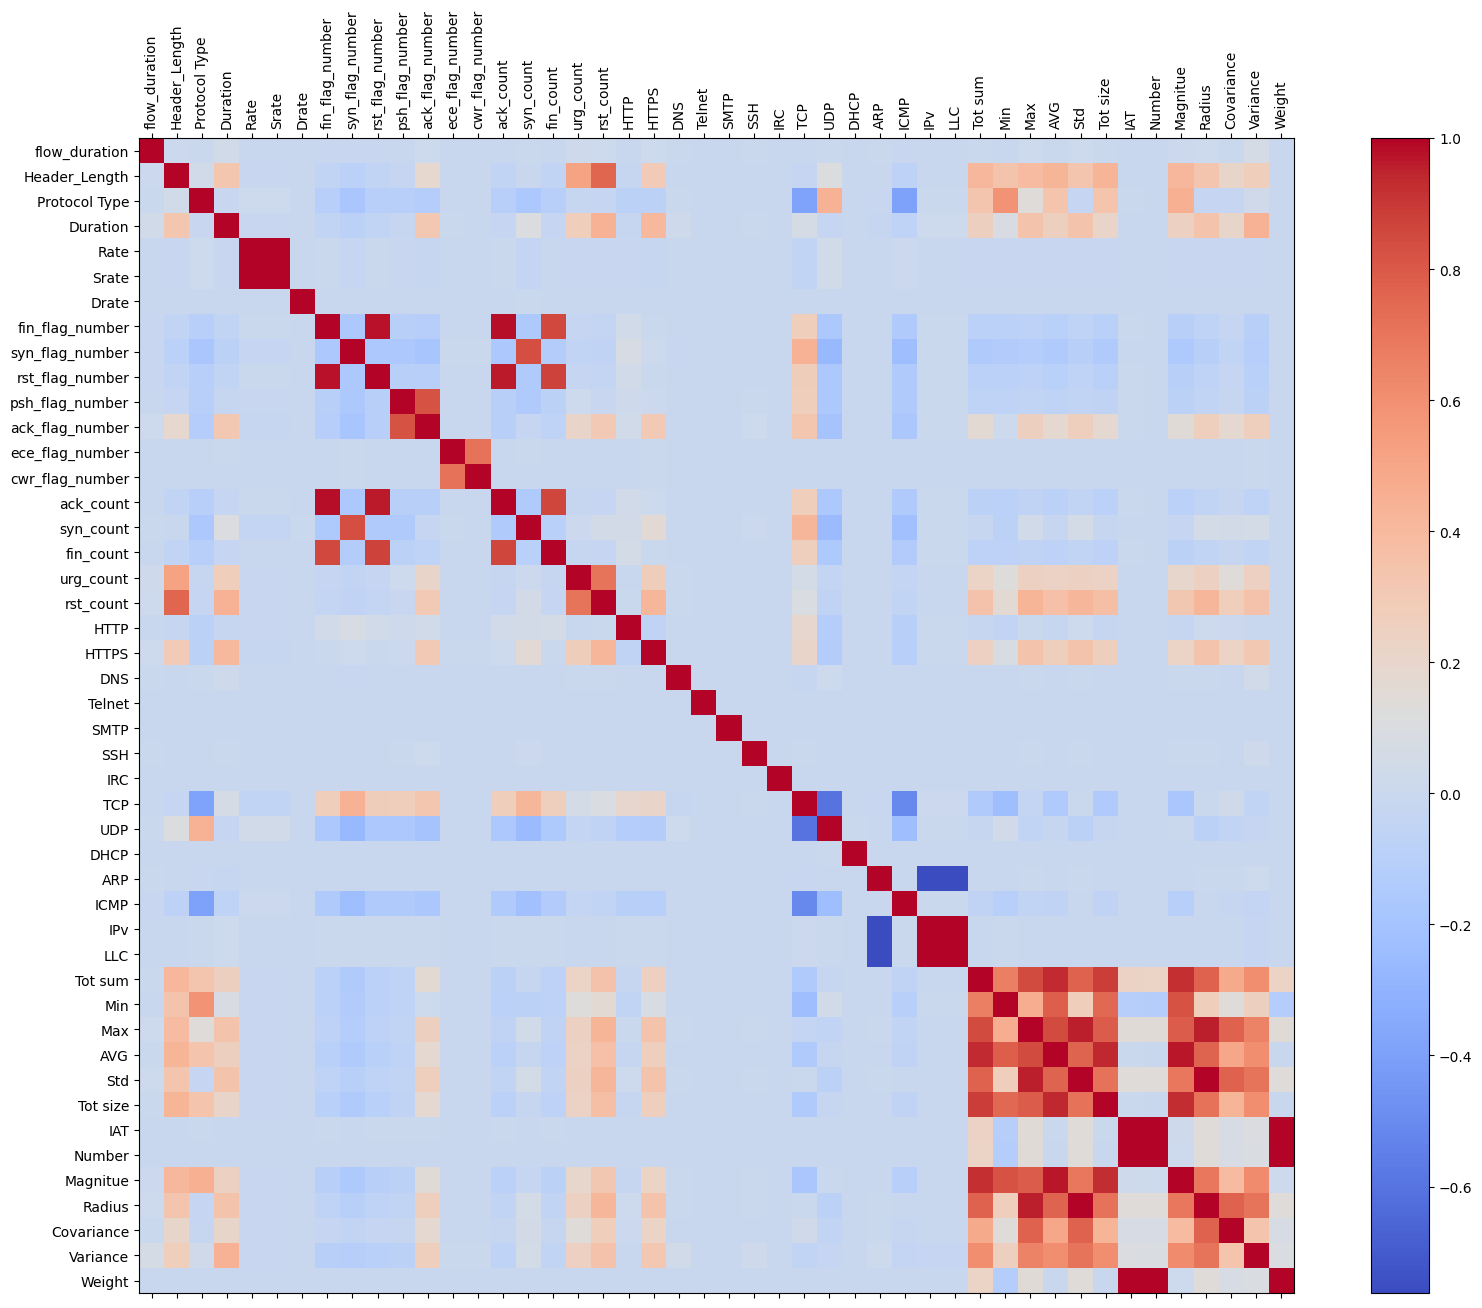

In [6]:
print(correlation_matrix)
print(correlation_matrix2)

fig, ax = plt.subplots(figsize=(20, 15))  
cax = ax.matshow(correlation_matrix, cmap='coolwarm')
fig.colorbar(cax)
ax.set_xticks(np.arange(len(util.X_columns)))
ax.set_yticks(np.arange(len(util.X_columns)))
ax.set_xticklabels(util.X_columns, rotation=90)
ax.set_yticklabels(util.X_columns)

plt.show()

**Create a plot showing the distribution/amount of each label for all the data**
1. Get the label from all of the files

In [29]:
DATASET_DIRECTORY = '../csvfiles/'

file_labels = []

for file in os.listdir(DATASET_DIRECTORY):
    if file.endswith(".csv"):
        file_df = pd.read_csv(DATASET_DIRECTORY + file)
        file_labels.append(file_df['label'])

2. Combine the file_labels together into a single Dataframe

In [43]:
label_df = pd.concat(file_labels, ignore_index = True)

label_count = label_df.value_counts().to_dict()

label_count

{'DDoS-ICMP_Flood': 7200504,
 'DDoS-UDP_Flood': 5412287,
 'DDoS-TCP_Flood': 4497667,
 'DDoS-PSHACK_Flood': 4094755,
 'DDoS-SYN_Flood': 4059190,
 'DDoS-RSTFINFlood': 4045285,
 'DDoS-SynonymousIP_Flood': 3598138,
 'DoS-UDP_Flood': 3318595,
 'DoS-TCP_Flood': 2671445,
 'DoS-SYN_Flood': 2028834,
 'BenignTraffic': 1098195,
 'Mirai-greeth_flood': 991866,
 'Mirai-udpplain': 890576,
 'Mirai-greip_flood': 751682,
 'DDoS-ICMP_Fragmentation': 452489,
 'MITM-ArpSpoofing': 307593,
 'DDoS-UDP_Fragmentation': 286925,
 'DDoS-ACK_Fragmentation': 285104,
 'DNS_Spoofing': 178911,
 'Recon-HostDiscovery': 134378,
 'Recon-OSScan': 98259,
 'Recon-PortScan': 82284,
 'DoS-HTTP_Flood': 71864,
 'VulnerabilityScan': 37382,
 'DDoS-HTTP_Flood': 28790,
 'DDoS-SlowLoris': 23426,
 'DictionaryBruteForce': 13064,
 'BrowserHijacking': 5859,
 'CommandInjection': 5409,
 'SqlInjection': 5245,
 'XSS': 3846,
 'Backdoor_Malware': 3218,
 'Recon-PingSweep': 2262,
 'Uploading_Attack': 1252}

3. Create plot show the amount of each label

<BarContainer object of 34 artists>

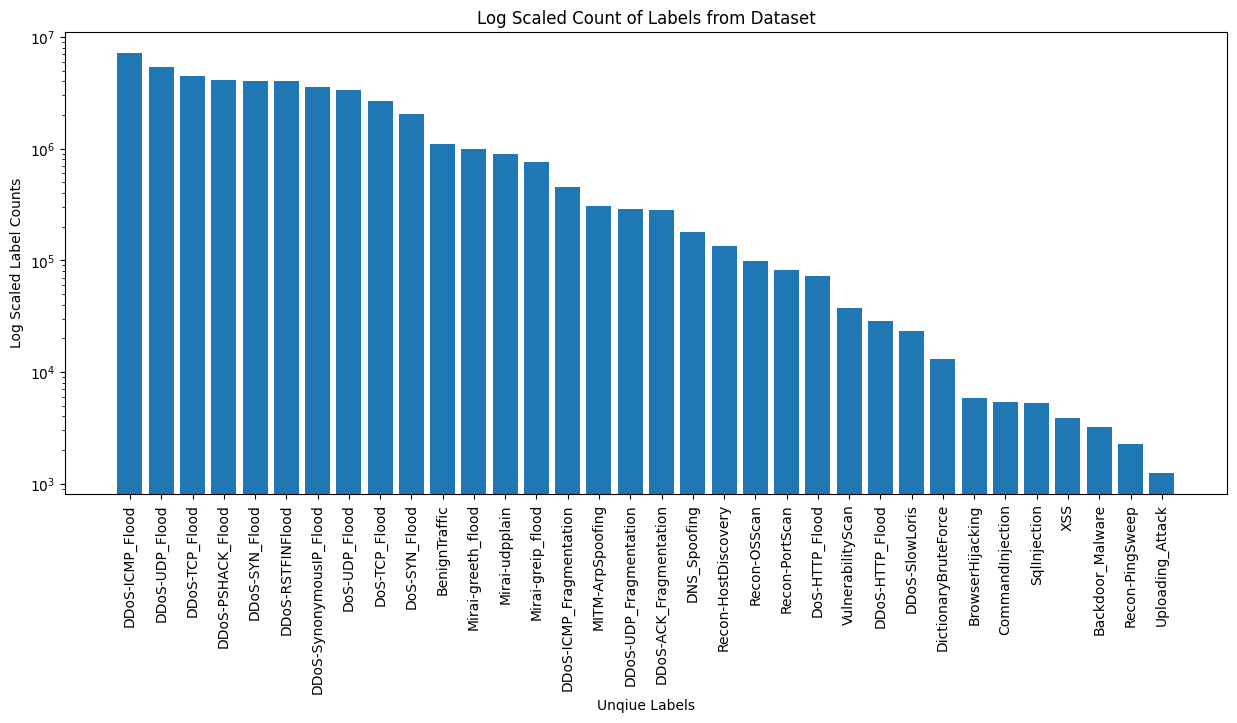

In [65]:
fig, ax = plt.subplots(figsize = (15, 6))

ax.tick_params(axis = 'x', labelrotation = 90)
ax.set_yscale(value = 'log')
ax.set_xlabel(xlabel = 'Unqiue Labels')
ax.set_ylabel(ylabel = 'Log Scaled Label Counts')
ax.set_title('Log Scaled Count of Labels from Dataset')

ax.bar(x = list(label_count.keys()), height = list(label_count.values()))

In [68]:
del file_labels, file_df, label_count, label_df

In [5]:
del train,test,correlation_matrix,correlation_matrix2

: 